## IMPORT LIBRARIES

In [ ]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import concatenate
from math import sqrt
from sklearn.metrics import mean_absolute_error
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## READ DATA

In [ ]:
dataset_path="/content/drive/MyDrive/datathon/"
dataset=os.listdir(dataset_path)

In [ ]:
string=""

string = string + dataset[7]
print(string)
print(dataset_path)

Dataframe Original (2).csv
/content/drive/MyDrive/datathon/


In [ ]:
dataset=pd.read_csv(dataset_path + string)

## CHECK FOR NULL VALUES

In [ ]:
dataset.isna().sum()

Unnamed: 0                0
region                    0
ercotNew                  0
Date                      0
Date_string               0
date                      0
Covid_Confirmed           0
Covid_Confirmed_Change    0
Covid_Death               0
Covid_Death_Change        0
gdp                       0
density                   0
tempCNew                  0
windspeedMilesNew         0
winddirDegreeNew          0
weatherCodeNew            0
precipMMNew               0
humidityNew               0
visibilityNew             0
pressureNew               0
cloudcoverNew             0
HeatIndexCNew             0
DewPointCNew              0
WindChillCNew             0
WindGustMilesNew          0
FeelsLikeCNew             0
uvIndexNew                0
dtype: int64

## CHECK THE CORRELATION

In [ ]:
corr=dataset.corr()
corr

,Unnamed: 0,ercotNew,Covid_Confirmed,Covid_Confirmed_Change,Covid_Death,Covid_Death_Change,gdp,density,tempCNew,windspeedMilesNew,winddirDegreeNew,weatherCodeNew,precipMMNew,humidityNew,visibilityNew,pressureNew,cloudcoverNew,HeatIndexCNew,DewPointCNew,WindChillCNew,WindGustMilesNew,FeelsLikeCNew,uvIndexNew
Unnamed: 0,1.000000,-0.163670,0.001494,0.000559,0.009331,0.004418,-0.404119,-0.035594,0.024451,0.203544,-0.039990,-0.052094,-0.040450,-0.096223,0.075661,-0.046374,-0.016266,0.016998,-0.027318,0.020080,0.179996,0.013673,0.010743
ercotNew,-0.163670,1.000000,0.093578,0.090455,0.070904,0.075040,0.846915,0.628642,0.189182,-0.181587,-0.019528,0.094178,0.062587,0.077560,-0.033074,0.009199,0.042444,0.220712,0.235582,0.182220,-0.243265,0.212121,0.083803
Covid_Confirmed,0.001494,0.093578,1.000000,0.562305,0.973046,0.582747,0.096193,0.070184,-0.039810,0.046144,-0.015980,0.025411,0.005845,0.025403,0.016678,0.019549,0.095877,-0.038965,-0.016581,-0.036950,0.019299,-0.038557,-0.025589
Covid_Confirmed_Change,0.000559,0.090455,0.562305,1.000000,0.529399,0.692193,0.080135,0.057169,-0.031716,0.026530,0.012891,-0.008356,-0.009550,-0.013553,0.026084,0.037677,0.043837,-0.029983,-0.031727,-0.030775,0.004595,-0.030465,-0.019252
Covid_Death,0.009331,0.070904,0.973046,0.529399,1.000000,0.570843,0.076187,0.069721,-0.027111,0.052133,-0.021358,0.023250,0.003370,0.029913,0.018975,0.012645,0.095904,-0.025947,-0.002570,-0.024250,0.025568,-0.025455,-0.020953
Covid_Death_Change,0.004418,0.075040,0.582747,0.692193,0.570843,1.000000,0.063407,0.054677,-0.020904,0.028177,-0.001299,-0.001458,-0.005460,-0.003751,0.021208,0.020237,0.053969,-0.017651,-0.016743,-0.021084,0.006524,-0.019061,-0.015469
gdp,-0.404119,0.846915,0.096193,0.080135,0.076187,0.063407,1.000000,0.688881,0.091040,-0.183724,-0.019454,0.096251,0.061102,0.177224,-0.073579,0.041679,0.084727,0.114913,0.201857,0.095725,-0.217564,0.116242,0.022545
density,-0.035594,0.628642,0.070184,0.057169,0.069721,0.054677,0.688881,1.000000,0.113108,0.011285,-0.042910,0.014801,0.004506,0.012530,0.008587,-0.015639,0.020074,0.122982,0.108736,0.114405,-0.049212,0.122916,0.033919
tempCNew,0.024451,0.189182,-0.039810,-0.031716,-0.027111,-0.020904,0.091040,0.113108,1.000000,0.005780,-0.058572,0.023487,0.023587,-0.189770,0.087800,-0.606166,-0.129414,0.992180,0.772970,0.996389,-0.112722,0.992350,0.476750
windspeedMilesNew,0.203544,-0.181587,0.046144,0.026530,0.052133,0.028177,-0.183724,0.011285,0.005780,1.000000,0.086255,0.001206,0.009473,-0.157990,0.090886,-0.218170,0.052521,-0.008874,-0.096671,-0.020083,0.898957,-0.031070,0.010395


In [ ]:
dataset.head(10)

,Unnamed: 0,region,ercotNew,Date,Date_string,date,Covid_Confirmed,Covid_Confirmed_Change,Covid_Death,Covid_Death_Change,gdp,density,tempCNew,windspeedMilesNew,winddirDegreeNew,weatherCodeNew,precipMMNew,humidityNew,visibilityNew,pressureNew,cloudcoverNew,HeatIndexCNew,DewPointCNew,WindChillCNew,WindGustMilesNew,FeelsLikeCNew,uvIndexNew
0,0,Coast,10233.975699,2008-07-01,2008-07-01 01:00:00,2008-07-01 00:00:00+00:00,0.0,0.0,0.0,0.0,20679845.64,663.382858,27.000000,3.000000,4.000000,176.0,2.200000,81.000000,9.000000,1018.000000,15.000000,30.000000,23.000000,27.000000,6.000000,30.000000,1.000000
1,1,Coast,9656.662104,2008-07-01,2008-07-01 02:00:00,2008-07-01 01:00:00+00:00,0.0,0.0,0.0,0.0,20679845.64,663.382858,26.000000,3.333333,20.000000,155.0,1.466667,79.000000,9.333333,1017.666667,13.000000,28.666667,21.666667,26.000000,6.333333,28.666667,1.000000
2,2,Coast,9253.200129,2008-07-01,2008-07-01 03:00:00,2008-07-01 02:00:00+00:00,0.0,0.0,0.0,0.0,20679845.64,663.382858,25.000000,3.666667,36.000000,134.0,0.733333,77.000000,9.666667,1017.333333,11.000000,27.333333,20.333333,25.000000,6.666667,27.333333,1.000000
3,3,Coast,9018.471792,2008-07-01,2008-07-01 04:00:00,2008-07-01 03:00:00+00:00,0.0,0.0,0.0,0.0,20679845.64,663.382858,24.000000,4.000000,52.000000,113.0,0.000000,75.000000,10.000000,1017.000000,9.000000,26.000000,19.000000,24.000000,7.000000,26.000000,1.000000
4,4,Coast,9001.706612,2008-07-01,2008-07-01 05:00:00,2008-07-01 04:00:00+00:00,0.0,0.0,0.0,0.0,20679845.64,663.382858,23.666667,4.000000,43.666667,113.0,0.000000,74.666667,10.000000,1017.000000,10.000000,25.666667,18.666667,23.666667,7.666667,25.666667,2.666667
5,5,Coast,9367.267437,2008-07-01,2008-07-01 06:00:00,2008-07-01 05:00:00+00:00,0.0,0.0,0.0,0.0,20679845.64,663.382858,23.333333,4.000000,35.333333,113.0,0.000000,74.333333,10.000000,1017.000000,11.000000,25.333333,18.333333,23.333333,8.333333,25.333333,4.333333
6,6,Coast,9749.104628,2008-07-01,2008-07-01 07:00:00,2008-07-01 06:00:00+00:00,0.0,0.0,0.0,0.0,20679845.64,663.382858,23.000000,4.000000,27.000000,113.0,0.000000,74.000000,10.000000,1017.000000,12.000000,25.000000,18.000000,23.000000,9.000000,25.000000,6.000000
7,7,Coast,10070.119258,2008-07-01,2008-07-01 08:00:00,2008-07-01 07:00:00+00:00,0.0,0.0,0.0,0.0,20679845.64,663.382858,24.666667,4.000000,36.000000,113.0,0.000000,68.666667,10.000000,1017.333333,14.333333,26.666667,18.333333,24.666667,7.333333,26.666667,6.333333
8,8,Coast,10561.626696,2008-07-01,2008-07-01 09:00:00,2008-07-01 08:00:00+00:00,0.0,0.0,0.0,0.0,20679845.64,663.382858,26.333333,4.000000,45.000000,113.0,0.000000,63.333333,10.000000,1017.666667,16.666667,28.333333,18.666667,26.333333,5.666667,28.333333,6.666667
9,9,Coast,11338.981089,2008-07-01,2008-07-01 10:00:00,2008-07-01 09:00:00+00:00,0.0,0.0,0.0,0.0,20679845.64,663.382858,28.000000,4.000000,54.000000,113.0,0.000000,58.000000,10.000000,1018.000000,19.000000,30.000000,19.000000,28.000000,4.000000,30.000000,7.000000


## FEATURE SELECTION

In [ ]:
dataset.set_index('Date_string', inplace=True)

In [ ]:
dataset.head(10)

,region,ercotNew,Date,Covid_Confirmed,Covid_Confirmed_Change,Covid_Death,Covid_Death_Change,gdp,density,tempCNew,windspeedMilesNew,winddirDegreeNew,weatherCodeNew,precipMMNew,humidityNew,visibilityNew,pressureNew,cloudcoverNew,HeatIndexCNew,DewPointCNew,WindChillCNew,WindGustMilesNew,FeelsLikeCNew,uvIndexNew
Date_string,,,,,,,,,,,,,,,,,,,,,,,,
2008-07-01 01:00:00,Coast,10233.975699,2008-07-01,0.0,0.0,0.0,0.0,20679845.64,663.382858,27.000000,3.000000,4.000000,176.0,2.200000,81.000000,9.000000,1018.000000,15.000000,30.000000,23.000000,27.000000,6.000000,30.000000,1.000000
2008-07-01 02:00:00,Coast,9656.662104,2008-07-01,0.0,0.0,0.0,0.0,20679845.64,663.382858,26.000000,3.333333,20.000000,155.0,1.466667,79.000000,9.333333,1017.666667,13.000000,28.666667,21.666667,26.000000,6.333333,28.666667,1.000000
2008-07-01 03:00:00,Coast,9253.200129,2008-07-01,0.0,0.0,0.0,0.0,20679845.64,663.382858,25.000000,3.666667,36.000000,134.0,0.733333,77.000000,9.666667,1017.333333,11.000000,27.333333,20.333333,25.000000,6.666667,27.333333,1.000000
2008-07-01 04:00:00,Coast,9018.471792,2008-07-01,0.0,0.0,0.0,0.0,20679845.64,663.382858,24.000000,4.000000,52.000000,113.0,0.000000,75.000000,10.000000,1017.000000,9.000000,26.000000,19.000000,24.000000,7.000000,26.000000,1.000000
2008-07-01 05:00:00,Coast,9001.706612,2008-07-01,0.0,0.0,0.0,0.0,20679845.64,663.382858,23.666667,4.000000,43.666667,113.0,0.000000,74.666667,10.000000,1017.000000,10.000000,25.666667,18.666667,23.666667,7.666667,25.666667,2.666667
2008-07-01 06:00:00,Coast,9367.267437,2008-07-01,0.0,0.0,0.0,0.0,20679845.64,663.382858,23.333333,4.000000,35.333333,113.0,0.000000,74.333333,10.000000,1017.000000,11.000000,25.333333,18.333333,23.333333,8.333333,25.333333,4.333333
2008-07-01 07:00:00,Coast,9749.104628,2008-07-01,0.0,0.0,0.0,0.0,20679845.64,663.382858,23.000000,4.000000,27.000000,113.0,0.000000,74.000000,10.000000,1017.000000,12.000000,25.000000,18.000000,23.000000,9.000000,25.000000,6.000000
2008-07-01 08:00:00,Coast,10070.119258,2008-07-01,0.0,0.0,0.0,0.0,20679845.64,663.382858,24.666667,4.000000,36.000000,113.0,0.000000,68.666667,10.000000,1017.333333,14.333333,26.666667,18.333333,24.666667,7.333333,26.666667,6.333333
2008-07-01 09:00:00,Coast,10561.626696,2008-07-01,0.0,0.0,0.0,0.0,20679845.64,663.382858,26.333333,4.000000,45.000000,113.0,0.000000,63.333333,10.000000,1017.666667,16.666667,28.333333,18.666667,26.333333,5.666667,28.333333,6.666667


In [ ]:
selected_columns = dataset[["ercotNew","region",		"Covid_Confirmed",	"Covid_Confirmed_Change",	"Covid_Death",	"Covid_Death_Change",	"density",	"windspeedMilesNew",	"winddirDegreeNew",	"weatherCodeNew"	,"visibilityNew",	"pressureNew",	"cloudcoverNew",	"HeatIndexCNew",	"DewPointCNew",	"WindGustMilesNew",	"FeelsLikeCNew"	]]
new_df = selected_columns.copy()
dataset=new_df

In [ ]:
dataset.shape

(907392, 17)

## LABEL ENCODER

In [ ]:
#Converts non numeric values to numeric values
values = dataset.values
encoder = LabelEncoder()

dataset['region']= encoder.fit_transform(dataset['region']) 

In [ ]:
dataset.head(10)

,ercotNew,region,Covid_Confirmed,Covid_Confirmed_Change,Covid_Death,Covid_Death_Change,density,windspeedMilesNew,winddirDegreeNew,weatherCodeNew,visibilityNew,pressureNew,cloudcoverNew,HeatIndexCNew,DewPointCNew,WindGustMilesNew,FeelsLikeCNew
Date_string,,,,,,,,,,,,,,,,,
2008-07-01 01:00:00,10233.975699,0,0.0,0.0,0.0,0.0,663.382858,3.000000,4.000000,176.0,9.000000,1018.000000,15.000000,30.000000,23.000000,6.000000,30.000000
2008-07-01 02:00:00,9656.662104,0,0.0,0.0,0.0,0.0,663.382858,3.333333,20.000000,155.0,9.333333,1017.666667,13.000000,28.666667,21.666667,6.333333,28.666667
2008-07-01 03:00:00,9253.200129,0,0.0,0.0,0.0,0.0,663.382858,3.666667,36.000000,134.0,9.666667,1017.333333,11.000000,27.333333,20.333333,6.666667,27.333333
2008-07-01 04:00:00,9018.471792,0,0.0,0.0,0.0,0.0,663.382858,4.000000,52.000000,113.0,10.000000,1017.000000,9.000000,26.000000,19.000000,7.000000,26.000000
2008-07-01 05:00:00,9001.706612,0,0.0,0.0,0.0,0.0,663.382858,4.000000,43.666667,113.0,10.000000,1017.000000,10.000000,25.666667,18.666667,7.666667,25.666667
2008-07-01 06:00:00,9367.267437,0,0.0,0.0,0.0,0.0,663.382858,4.000000,35.333333,113.0,10.000000,1017.000000,11.000000,25.333333,18.333333,8.333333,25.333333
2008-07-01 07:00:00,9749.104628,0,0.0,0.0,0.0,0.0,663.382858,4.000000,27.000000,113.0,10.000000,1017.000000,12.000000,25.000000,18.000000,9.000000,25.000000
2008-07-01 08:00:00,10070.119258,0,0.0,0.0,0.0,0.0,663.382858,4.000000,36.000000,113.0,10.000000,1017.333333,14.333333,26.666667,18.333333,7.333333,26.666667
2008-07-01 09:00:00,10561.626696,0,0.0,0.0,0.0,0.0,663.382858,4.000000,45.000000,113.0,10.000000,1017.666667,16.666667,28.333333,18.666667,5.666667,28.333333


##CONVERT TIME SERIES TO A SUPERVISED LEARNING PROBLEM

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  df = DataFrame(data)
  cols, names = list(), list()
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
      names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
      names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  agg = concat(cols, axis=1)
  agg.columns = names
	# drop rows with NaN values
  if dropnan:
    agg.dropna(inplace=True)
  return agg
  

In [ ]:
values = dataset.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values) #Scale values

In [ ]:
reframed = series_to_supervised(scaled, 1, 1)
reframed=reframed.iloc[: , :18] #choose neccessary columns
reframed.head(10)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var1(t)
1,0.374677,0.0,0.0,0.183176,0.0,0.032872,0.796505,0.060000,0.011111,0.228261,0.900000,0.515625,0.150000,0.637500,0.925926,0.090909,0.670455,0.352482
2,0.352482,0.0,0.0,0.183176,0.0,0.032872,0.796505,0.066667,0.055556,0.152174,0.933333,0.510417,0.130000,0.620833,0.909465,0.095960,0.655303,0.336970
3,0.336970,0.0,0.0,0.183176,0.0,0.032872,0.796505,0.073333,0.100000,0.076087,0.966667,0.505208,0.110000,0.604167,0.893004,0.101010,0.640152,0.327946
4,0.327946,0.0,0.0,0.183176,0.0,0.032872,0.796505,0.080000,0.144444,0.000000,1.000000,0.500000,0.090000,0.587500,0.876543,0.106061,0.625000,0.327302
5,0.327302,0.0,0.0,0.183176,0.0,0.032872,0.796505,0.080000,0.121296,0.000000,1.000000,0.500000,0.100000,0.583333,0.872428,0.116162,0.621212,0.341356
6,0.341356,0.0,0.0,0.183176,0.0,0.032872,0.796505,0.080000,0.098148,0.000000,1.000000,0.500000,0.110000,0.579167,0.868313,0.126263,0.617424,0.356036
7,0.356036,0.0,0.0,0.183176,0.0,0.032872,0.796505,0.080000,0.075000,0.000000,1.000000,0.500000,0.120000,0.575000,0.864197,0.136364,0.613636,0.368377
8,0.368377,0.0,0.0,0.183176,0.0,0.032872,0.796505,0.080000,0.100000,0.000000,1.000000,0.505208,0.143333,0.595833,0.868313,0.111111,0.632576,0.387273
9,0.387273,0.0,0.0,0.183176,0.0,0.032872,0.796505,0.080000,0.125000,0.000000,1.000000,0.510417,0.166667,0.616667,0.872428,0.085859,0.651515,0.417159
10,0.417159,0.0,0.0,0.183176,0.0,0.032872,0.796505,0.080000,0.150000,0.000000,1.000000,0.515625,0.190000,0.637500,0.876543,0.060606,0.670455,0.445586


In [ ]:
dataset.shape

(907392, 17)

In [ ]:
dataset.tail(169)

,ercotNew,region,Covid_Confirmed,Covid_Confirmed_Change,Covid_Death,Covid_Death_Change,density,windspeedMilesNew,winddirDegreeNew,weatherCodeNew,visibilityNew,pressureNew,cloudcoverNew,HeatIndexCNew,DewPointCNew,WindGustMilesNew,FeelsLikeCNew
Date_string,,,,,,,,,,,,,,,,,
2021-06-02 00:00:00,1105.32,7,52465.0,16.0,1170.0,1.0,450.119392,7.000000,70.333333,386.0,8.666667,1016.000000,73.666667,20.000000,18.333333,13.333333,19.666667
2021-06-02 01:00:00,1004.24,7,52465.0,16.0,1170.0,1.0,450.119392,8.000000,39.000000,386.0,8.000000,1016.000000,71.000000,19.000000,18.000000,15.000000,19.000000
2021-06-02 02:00:00,984.76,7,52465.0,16.0,1170.0,1.0,450.119392,7.666667,42.666667,376.0,8.333333,1016.000000,75.000000,18.666667,17.666667,14.000000,18.666667
2021-06-02 03:00:00,945.18,7,52465.0,16.0,1170.0,1.0,450.119392,7.333333,46.333333,366.0,8.666667,1016.000000,79.000000,18.333333,17.333333,13.000000,18.333333
2021-06-02 04:00:00,934.35,7,52465.0,16.0,1170.0,1.0,450.119392,7.000000,50.000000,356.0,9.000000,1016.000000,83.000000,18.000000,17.000000,12.000000,18.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-08 20:00:00,1919.17,7,52541.0,11.0,1176.0,2.0,450.119392,18.000000,159.666667,116.0,10.000000,1009.333333,7.000000,36.000000,20.333333,25.333333,36.000000
2021-06-08 21:00:00,1841.61,7,52541.0,11.0,1176.0,2.0,450.119392,19.000000,161.333333,116.0,10.000000,1009.666667,6.000000,35.000000,20.666667,28.666667,35.000000
2021-06-08 22:00:00,1834.27,7,52541.0,11.0,1176.0,2.0,450.119392,20.000000,163.000000,116.0,10.000000,1010.000000,5.000000,34.000000,21.000000,32.000000,34.000000


## SPLIT DATASET TO TRAIN TEST AND VALIDATION

In [ ]:
values = reframed.values


train = values[:701000, :]
validation = values[701000:907223, :]
test=values[907223:,:]
print(values.shape)

(907391, 18)


In [ ]:
train_X, train_y = train[:, :-1], train[:, -1]
validation_X, validation_y = validation[:, :-1], validation[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
validation_X = validation_X.reshape((validation_X.shape[0], 1, validation_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape,validation_X.shape, validation_y.shape)

(701000, 1, 17) (701000,) (168, 1, 17) (168,) (206223, 1, 17) (206223,)


##TRAIN LSTM MODEL

In [ ]:

model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

history = model.fit(train_X, train_y, epochs=20, batch_size=150, validation_data=(validation_X, validation_y), verbose=2, shuffle=False)

Epoch 1/20
4674/4674 - 23s - loss: 0.0202 - val_loss: 0.0231
Epoch 2/20
4674/4674 - 20s - loss: 0.0079 - val_loss: 0.0134
Epoch 3/20
4674/4674 - 21s - loss: 0.0075 - val_loss: 0.0081
Epoch 4/20
4674/4674 - 20s - loss: 0.0073 - val_loss: 0.0058
Epoch 5/20
4674/4674 - 19s - loss: 0.0072 - val_loss: 0.0066
Epoch 6/20
4674/4674 - 20s - loss: 0.0072 - val_loss: 0.0084
Epoch 7/20
4674/4674 - 20s - loss: 0.0071 - val_loss: 0.0085
Epoch 8/20
4674/4674 - 20s - loss: 0.0070 - val_loss: 0.0075
Epoch 9/20
4674/4674 - 20s - loss: 0.0070 - val_loss: 0.0076
Epoch 10/20
4674/4674 - 22s - loss: 0.0069 - val_loss: 0.0077
Epoch 11/20
4674/4674 - 20s - loss: 0.0069 - val_loss: 0.0077
Epoch 12/20
4674/4674 - 20s - loss: 0.0068 - val_loss: 0.0067
Epoch 13/20
4674/4674 - 20s - loss: 0.0067 - val_loss: 0.0062
Epoch 14/20
4674/4674 - 21s - loss: 0.0067 - val_loss: 0.0055
Epoch 15/20
4674/4674 - 20s - loss: 0.0066 - val_loss: 0.0054
Epoch 16/20
4674/4674 - 20s - loss: 0.0066 - val_loss: 0.0056
Epoch 17/20
4674/

##TRAINING VS VALIDATION LOSS

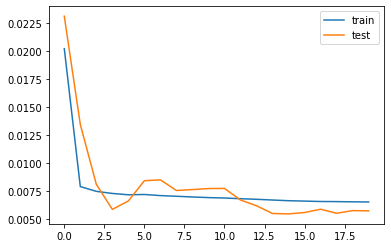

In [26]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [27]:

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

## Performance evaluation

In [28]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('mae',mean_absolute_error(inv_y,inv_yhat))
print('Test RMSE: %.3f' % rmse)

mae 83.82965056069929
Test RMSE: 102.460


In [44]:
df = pd.DataFrame({'ercotNew':inv_y, 'ercotNew_pred':inv_yhat})

In [45]:
df.head(10)

,ercotNew,ercotNew_pred
0,1004.239992,959.608149
1,984.760020,850.254225
2,945.180024,841.384726
3,934.349980,814.793574
4,969.859952,813.607247
5,960.189975,849.557332
6,1008.940049,845.484207
7,1101.790043,894.016259
8,1096.620028,995.438080
9,1072.810054,1009.443485


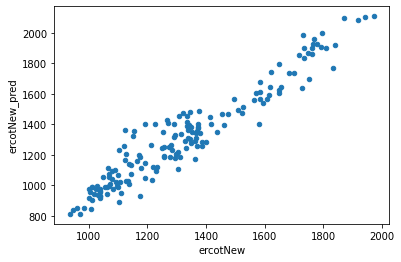

In [46]:
act_pred=df.plot('ercotNew', 'ercotNew_pred', kind='scatter')

##SAVE MODELS

In [32]:
df.shape

(168, 2)

In [47]:
temp=dataset.tail(168)

In [35]:
temp.shape

(168, 17)

In [69]:
temp.to_csv('last_7_full.csv')

In [48]:
temp_columns = temp[["ercotNew","region"]]
new_df = temp_columns.copy()
temp_=new_df

In [66]:
df.to_csv("actua-predicted.csv")

In [68]:
temp_.to_csv('last_7.csv')

In [76]:
import pickle
filename='/content'
model.save(filename)

INFO:tensorflow:Assets written to: /content/assets


INFO:tensorflow:Assets written to: /content/assets
